In [55]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [64]:
runtime=[]
qubits=[]
for i in range(2,12):
  start = time.time()
  # Define single-qubit gates
  H_gate = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)
  X_gate = np.array([[0, 1], [1, 0]], dtype=complex)
  I_gate = np.eye(2, dtype=complex)

  # Define 2-qubit CNOT gate as a base gate (for later embedding in n-qubits)
  CNOT_base = np.array([
      [1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 0, 1],
      [0, 0, 1, 0]
  ], dtype=complex)

  # Create an n-qubit identity matrix for convenience
  def create_identity(n):
      return np.eye(2**n, dtype=complex)

  # Function to apply a single-qubit gate to a specific qubit in an n-qubit system
  def apply_single_qubit_gate(gate, target_qubit, n):
      gate_n = 1
      for i in range(n):
          if i == target_qubit:
              gate_n = np.tensordot(gate_n, gate, axes=0)
          else:
              gate_n = np.tensordot(gate_n, I_gate, axes=0)

      # Reshape to 2^n x 2^n matrix to act on the n-qubit state
      gate_n = gate_n.reshape([2]*2*n)
      gate_n = gate_n.transpose([i for i in range(0, 2*n, 2)] + [i for i in range(1, 2*n, 2)])
      return gate_n.reshape(2**n, 2**n)

  # Function to apply a two-qubit CNOT gate with specified control and target in an n-qubit system
  def apply_cnot_gate(control, target, n):
      gate_n = 1
      for i in range(n):
          if i == control:
              # Use the CNOT_base if the target is next to control; otherwise, use identity
              gate_n = np.tensordot(gate_n, CNOT_base if i + 1 == target else I_gate, axes=0)
          elif i == target:
              # Skip since target will be handled by control's application of CNOT_base
              continue
          else:
              gate_n = np.tensordot(gate_n, I_gate, axes=0)

      # Reshape to 2^n x 2^n matrix
      gate_n = gate_n.reshape([2]*2*n)
      gate_n = gate_n.transpose([i for i in range(0, 2*n, 2)] + [i for i in range(1, 2*n, 2)])
      return gate_n.reshape(2**n, 2**n)

  # Example usage
  n = i  # Number of qubits
  final_gate = create_identity(n)

  # Apply Hadamard on the first qubit
  final_gate = apply_single_qubit_gate(H_gate, 0, n) @ final_gate

  # Apply X on the second qubit
  final_gate = apply_single_qubit_gate(X_gate, 1, n) @ final_gate

  # Apply CNOT with control on qubit 0 and target on qubit 1
  final_gate = apply_cnot_gate(0, 1, n) @ final_gate

  # Print the final matrix result
  np.set_printoptions(precision=3, suppress=True)
  #print("Final matrix representation for n-qubit system:\n", final_gate)
  # define a sample code segment
  qubits=np.append(i,qubits)
  a = 0
  for i in range(1000):
      a += (i**100)

  # record end time
  end = time.time()

  # print the difference between start
  # and end time in milli. secs
  print("The time of execution of above program is :",
        (end-start) * 10**3, "ms")
  runtime=np.append((end-start) * 10**3,runtime)


The time of execution of above program is : 2.2504329681396484 ms
The time of execution of above program is : 2.399444580078125 ms
The time of execution of above program is : 2.386331558227539 ms
The time of execution of above program is : 5.815267562866211 ms
The time of execution of above program is : 10.084390640258789 ms
The time of execution of above program is : 11.698246002197266 ms
The time of execution of above program is : 49.041748046875 ms
The time of execution of above program is : 198.69327545166016 ms
The time of execution of above program is : 1890.6280994415283 ms
The time of execution of above program is : 8328.878164291382 ms


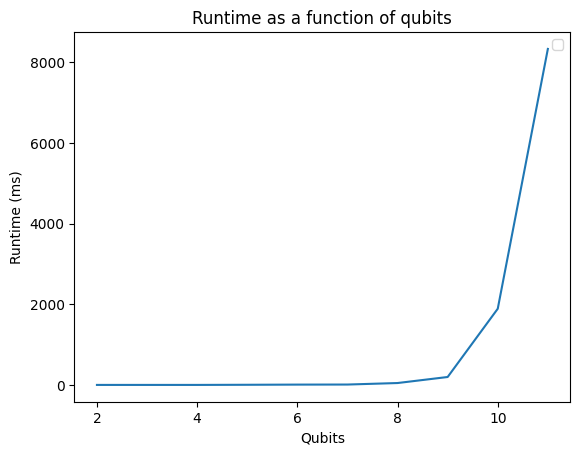

In [65]:
plt.plot(qubits, runtime)
plt.title('Runtime as a function of qubits')
plt.xlabel("Qubits")
plt.ylabel("Runtime (ms)")
plt.legend()
plt.show()

In [66]:
runtime2=[]
qubits2=[]
for i in range(2,12):
  start = time.time()
  # Define single-qubit gates
  H_gate = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)
  X_gate = np.array([[0, 1], [1, 0]], dtype=complex)
  I_gate = np.eye(2, dtype=complex)

  # Define 2-qubit CNOT gate
  CNOT_base = np.array([
      [1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 0, 1],
      [0, 0, 1, 0]
  ], dtype=complex)

  # Apply a single-qubit gate to a specific qubit in an n-qubit system using np.kron
  def apply_single_qubit_gate(gate, target_qubit, n):
      gate_n = 1
      for i in range(n):
          if i == target_qubit:
              gate_n = np.kron(gate_n, gate)
          else:
              gate_n = np.kron(gate_n, I_gate)
      return gate_n

  # Apply a two-qubit CNOT gate with a control and target qubit in an n-qubit system using np.kron
  def apply_cnot_gate(control, target, n):
      gate_n = 1
      for i in range(n):
          if i == control:
              # Place CNOT_base if control and target are adjacent, otherwise identity
              gate_n = np.kron(gate_n, CNOT_base if i + 1 == target else I_gate)
          elif i == target:
              # Skip target as it's handled by control
              continue
          else:
              gate_n = np.kron(gate_n, I_gate)
      return gate_n

  # Example usage
  n = 2  # Number of qubits
  final_gate = np.eye(2**n, dtype=complex)

  # Apply Hadamard on the first qubit
  final_gate = apply_single_qubit_gate(H_gate, 0, n) @ final_gate

  # Apply X on the second qubit
  final_gate = apply_single_qubit_gate(X_gate, 1, n) @ final_gate

  # Apply CNOT with control on qubit 0 and target on qubit 1
  final_gate = apply_cnot_gate(0, 1, n) @ final_gate

  # Print the final matrix result
  np.set_printoptions(precision=3, suppress=True)
  qubits2=np.append(i,qubits2)
  a = 0
  for i in range(1000):
      a += (i**100)

  # record end time
  end = time.time()

  # print the difference between start
  # and end time in milli. secs
  print("The time of execution of above program is :",
        (end-start) * 10**3, "ms")
  runtime2=np.append((end-start) * 10**3,runtime2)

The time of execution of above program is : 1.379251480102539 ms
The time of execution of above program is : 1.3172626495361328 ms
The time of execution of above program is : 1.3022422790527344 ms
The time of execution of above program is : 1.3186931610107422 ms
The time of execution of above program is : 1.3053417205810547 ms
The time of execution of above program is : 1.7895698547363281 ms
The time of execution of above program is : 1.3866424560546875 ms
The time of execution of above program is : 1.2919902801513672 ms
The time of execution of above program is : 1.415252685546875 ms
The time of execution of above program is : 1.2829303741455078 ms


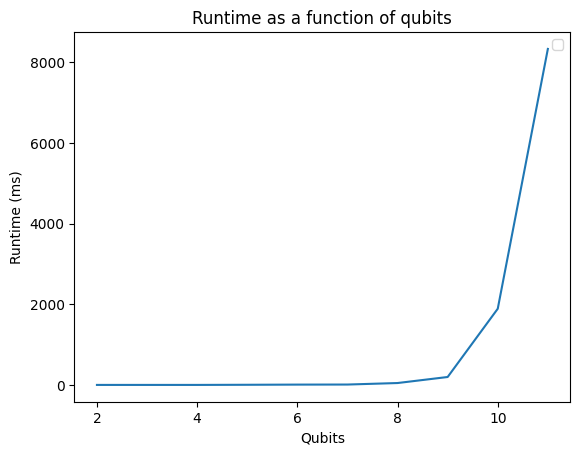

In [67]:
plt.plot(qubits, runtime)
plt.title('Runtime as a function of qubits')
plt.xlabel("Qubits")
plt.ylabel("Runtime (ms)")
plt.legend()
plt.show()

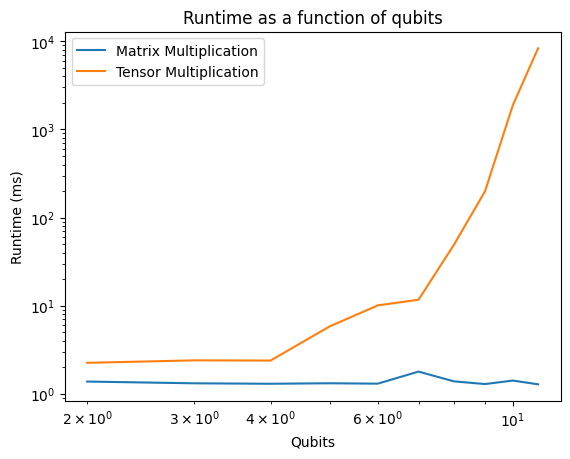

In [68]:
plt.loglog(qubits2, runtime2,label='Matrix Multiplication')
plt.loglog(qubits, runtime,label='Tensor Multiplication')
plt.title('Runtime as a function of qubits')
plt.xlabel("Qubits")
plt.ylabel("Runtime (ms)")
plt.legend()
plt.show()